# <div class="alert alert-success">
<h3><center>" Diagnosa Penyakit Kanker Payudara Menggunakan Jaringan Saraf Tiruan"<center> </h2>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: Imam Malik</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011381621093</strong></h3>
</li>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

C:\Users\Linda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Berikut adalah Daftar Modul yang digunakan :

      - Numpy = Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program 
                ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

      - Pandas = Modul ini akan digunakan untuk Load Dataset, karena pandas lebih baik untuk load data dengan skala besar.

      - Matplotlib = Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, 
                     grafik confusion matrix, grafik akurasi, dll.

      - Keras = Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network.

      - Sklearn = Modul ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti  
                  preprocessing, dan lainnya.

In [2]:
df = np.loadtxt("BreastCancerTissue.csv", delimiter=",")

Kode di atas digunakan untuk load dataset dengan nama "breastCancerTissue.csv"

In [3]:
X = df[:,0:9]
Y = df[:,9]
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

Nilai variabel X adalah Nilai Input.


In [4]:
Y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1.

Nilai Variabel Y adalah Output

Nilai Outputnya adalah 0 dan 1.

In [5]:
scaler = MinMaxScaler()
BreastCancerTissue = scaler.fit_transform(X)

In [6]:
from keras.utils.np_utils import to_categorical
Y_categorical = to_categorical(Y)
Y_categorical.shape

(683, 2)

In [7]:
model = Sequential()

Lapisan Pertama dalam model Sequential

In [8]:
model.add(Dense(50, input_dim=9, activation='relu'))

Kodingan di atas merupakan Layer pertama dari Neural Network.

   * Dense 50 = Neural Network pada layer pertama terdiri dari 50 neuron.

   * Relu = Merupakan fungsi aktivasi yang digunakan pada layer ini.
   
   * Input dim 9 = Berdasarkan dataset yang dipakai, terdiri dari 10 kategori. 9 kategori input, dan 1 kategori output.

In [9]:
model.add(Dense(40, activation='relu'))

Kodingan di atas merupakan Layer Kedua dari Neural Network.

   * Dense 40 = Neural Network pada layer pertama ini terdiri dari 40 neuron.

   * Relu = Merupakan fungsi aktivasi yang digunakan pada layer ini.

model.add(Dense(2, activation='softmax'))

In [ ]:
    * Dense 2 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 2 neuron, neuron inilah yang akan  
                menghasilkan output berdasarkan dataset yang ada dan memprediksi apakah terdapat penipuan kartu kredit atau 
                tidak.

    * Softmax = Merupakan fungsi lapisan jaringan saraf yang digunakan pada layer ini.
                Probabilitas yang dihitung akan berada dikisaran 0 dan 1, jumlah semua probabilitas akan sama dengan 1.

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'] )

Fungsi kompilasi pada model

     * Loss = Pengidentifikasi string dari fungsi kerugian yang ada (seperti kategorikal_crossentropy), atau dapat 
              menjadi fungsi obyektif. 
              Tujuan yang akan coba diminimalkan oleh model.

     * Optimizer = Pengenal string dari pengoptimal yang ada (seperti adam), atau turunan dari kelas Pengoptimal. 

     * Metrics = Untuk masalah klasifikasi apa pun, mengaturnya ke metrik = ['akurasi']. Metrik bisa menjadi  
                 pengidentifikasi string dari metrik yang ada atau fungsi metrik khusus.

In [12]:
history=model.fit(BreastCancerTissue, Y_categorical, validation_split=0.5, epochs=100, batch_size=12)

Train on 341 samples, validate on 342 samples
Epoch 1/100
341/341 [==============================] - 0s 996us/step - loss: 0.5764 - acc: 0.8182 - val_loss: 0.5659 - val_acc: 0.7953
Epoch 2/100
341/341 [==============================] - 0s 188us/step - loss: 0.4009 - acc: 0.9355 - val_loss: 0.3603 - val_acc: 0.9649
Epoch 3/100
341/341 [==============================] - 0s 176us/step - loss: 0.2472 - acc: 0.9619 - val_loss: 0.1911 - val_acc: 0.9766
Epoch 4/100
341/341 [==============================] - 0s 140us/step - loss: 0.1704 - acc: 0.9589 - val_loss: 0.1228 - val_acc: 0.9795
Epoch 5/100
341/341 [==============================] - 0s 222us/step - loss: 0.1385 - acc: 0.9560 - val_loss: 0.0887 - val_acc: 0.9766
Epoch 6/100
341/341 [==============================] - 0s 176us/step - loss: 0.1280 - acc: 0.9531 - val_loss: 0.0757 - val_acc: 0.9766
Epoch 7/100
341/341 [==============================] - 0s 162us/step - loss: 0.1190 - acc: 0.9619 - val_loss: 0.0707 - val_acc: 0.9766
Epoch 8/1

Epoch 61/100
341/341 [==============================] - 0s 155us/step - loss: 0.0492 - acc: 0.9824 - val_loss: 0.0619 - val_acc: 0.9795
Epoch 62/100
341/341 [==============================] - 0s 141us/step - loss: 0.0460 - acc: 0.9795 - val_loss: 0.0587 - val_acc: 0.9737
Epoch 63/100
341/341 [==============================] - 0s 152us/step - loss: 0.0453 - acc: 0.9795 - val_loss: 0.0602 - val_acc: 0.9737
Epoch 64/100
341/341 [==============================] - 0s 129us/step - loss: 0.0449 - acc: 0.9795 - val_loss: 0.0615 - val_acc: 0.9795
Epoch 65/100
341/341 [==============================] - 0s 130us/step - loss: 0.0449 - acc: 0.9824 - val_loss: 0.0597 - val_acc: 0.9766
Epoch 66/100
341/341 [==============================] - 0s 157us/step - loss: 0.0434 - acc: 0.9853 - val_loss: 0.0622 - val_acc: 0.9737
Epoch 67/100
341/341 [==============================] - 0s 152us/step - loss: 0.0409 - acc: 0.9853 - val_loss: 0.0682 - val_acc: 0.9795
Epoch 68/100
341/341 [==========================

Objek histori dikembalikan dari panggilan ke fungsi fit () yang digunakan untuk train model.

       * Epoch = adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal 
                 untuk sekali putaran (backpropagation). 

       * Batch Size 12 = adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 12 
                         bagian untuk memudahkan index pada saat pelatihan. 

       * Validation Split 0.5 = Adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0,5 
                                atau 50%, dan data testing sebesar 0,5 atau 50%.

In [13]:
predict = model.predict(BreastCancerTissue)
predict

array([[9.9999940e-01, 5.5263610e-07],
       [6.9275022e-01, 3.0724978e-01],
       [9.9999988e-01, 1.2703983e-07],
       ...,
       [4.7585159e-04, 9.9952412e-01],
       [1.3898490e-02, 9.8610151e-01],
       [7.5352546e-05, 9.9992466e-01]], dtype=float32)

Parameter pertama menjadi array numpy, menyediakan daftar yang tidak memiliki atribut bentuk yang memiliki array numpy.

In [14]:
scores = model.evaluate(BreastCancerTissue, Y_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

683/683 [==============================] - 0s 18us/step

acc: 98.83%


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_categorical.argmax(axis=1),predict.argmax(axis=1))

In [16]:
cm

array([[437,   7],
       [  1, 238]], dtype=int64)

Confusion matrix = Untuk melakukan perhitungan akurasi pada konsep data mining.
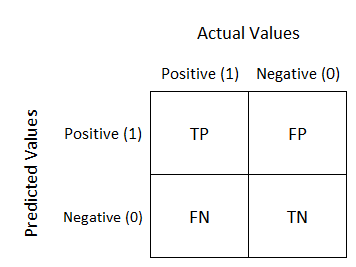

In [17]:
ac = ((436+238)/(436+238+8+1))
print("\n%s: %.2f%%" % ("Akurasi ", ac*100))


Akurasi : 98.68%


Rumus untuk mencari akurasi berdasarkan Confusion Matrix :
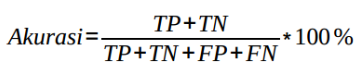

In [18]:
prec = ((436)/(8+436))
print("\n%s: %.2f%%" %("Presisi", prec*100))


Presisi: 98.20%


Rumus untuk mencari presisi berdasarkan Confusion Matrix :
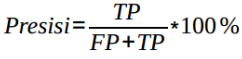

In [19]:
rec = ((436)/(1+436))
print("\n%s: %.2f%%" %("Recall", rec*100))


Recall: 99.77%


Rumus untuk mencari recall berdasarkan Confusion Matrix :
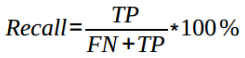

In [20]:
TNR = ((8)/(436+8))
print("\n%s: %.2f%%" %("Skor True Negative Rate", TNR))


Skor True Negative Rate: 0.02%


In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

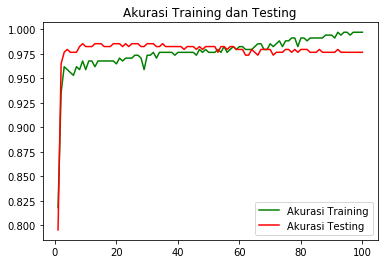

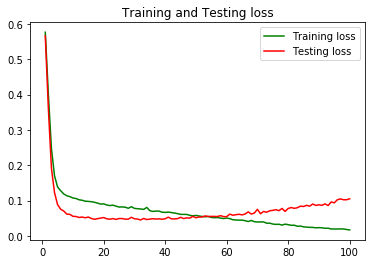

In [22]:
plt.plot(epochs, acc, 'b',color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b',color='red', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.show()
plt.plot(epochs, loss, 'b',color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='red', label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()